# Calculus
Playground for stuff as I relearn calculus

## Euler's method

<Axes: xlabel='x'>

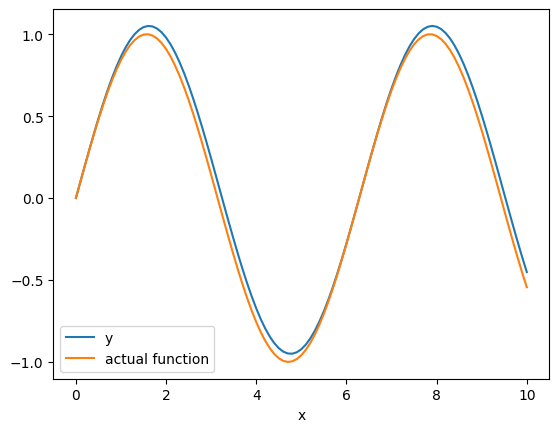

In [11]:
import pandas as pd
import numpy as np
import math

def euler(x, y, dy_dx, step, i):
    """
    Run Euler's method for i iterations, starting at point (x, y), using the the differential equation defined by dy_dx

    :param x: initial x value
    :param y: initial y value
    :param dy_dx: function returning the result of a differential equation evaluated at a certain x and y, i.e. dy_dx(x, y)
    :param step: increase x by step every loop
    :param i: how many iterations to run Euler's method for
    :return: list of tuples containing x, y values for every evaluation, e.g. [(x,y), (x,y), (x,y)]
    """
    results = [(x, y)]
    while i > 0:
        y = round(y + dy_dx(x, y)*step, 5) # rounding to avoid floating point issues
        x = round(x + step, 5)
        results.append((x, y))
        i -= 1
    
    return results

# plot results for Euler's approximation using step=0.1 and 50 iterations
x0=0
y0=0
y = lambda x: math.sin(x)
dy_dx = lambda x, y: math.cos(x) # f(x) = sin(x), f'(x) = cos(x)

results = euler(x=x0, y=y0, dy_dx=(lambda x, y: math.cos(x)), step=0.1, i=100)
df = pd.DataFrame(columns=["x", "y"], data=results)
df["actual function"] = df["x"].apply(y)
df.set_index("x").plot()